In [31]:
import pandas as pd
from matplotlib import pyplot as plt

In [53]:
df = pd.read_csv('ns3-log-Rm4CvS1jjqdym5l1-09-29-2021-14-36-20.csv', header=[0])


In [43]:
def getOffloadingStatsOnly(df):
    d = df.groupby('OFFLOADING_SESSION_ID', as_index=False).first()
    return pd.DataFrame(d, columns = ['OFFLOADING_SESSION_ID','QUERY_INITIATED_MS', 'QUERY_RESPONSE_RCVD_MS', 'QUERY_RTT_MS', 'MAX_RTT_MS', 'MIN_RTT_MS', 'MAX_TRANSFER_TIME_MS', 'MIN_TRANSFER_TIME_MS'])

In [55]:
offloaddf = getOffloadingStatsOnly(df)
offloaddf['QUERY_INITIATED_MS'].tolist()

[5000, 10000, 10000, 10000, 15000]

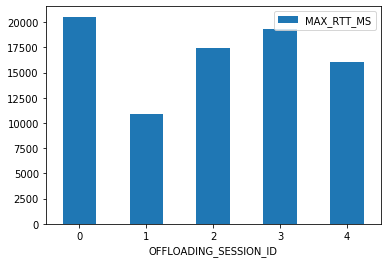

In [45]:
ax = offloaddf.plot.bar(x='OFFLOADING_SESSION_ID', y='MAX_RTT_MS', rot=0)

In [42]:
def chartMaximumRttOfSessions(logfiles, labels):
    df = []
    # read all the log files into dataframes
    for f in logfiles:
        df.append(pd.read_csv(f, header=[0]))
    
    # now for all the files, we extract the offloading aggregate results only
    offdf = []
    for _d in df:
        d = _d.groupby('OFFLOADING_SESSION_ID', as_index=False).first()
        offdf.append(pd.DataFrame(d, columns = ['OFFLOADING_SESSION_ID','QUERY_INITIATED_MS', 'QUERY_RESPONSE_RCVD_MS', 'QUERY_RTT_MS', 'MAX_RTT_MS', 'MIN_RTT_MS', 'MAX_TRANSFER_TIME_MS', 'MIN_TRANSFER_TIME_MS']))
        
    # now we plot all of them
    data = {}
    index = []
    i = 0
    for d in offdf:
        index = d['OFFLOADING_SESSION_ID'].tolist()
        val = d['MAX_RTT_MS'].tolist()
        r = sorted(zip(index,val))
        data[labels[i]] = [y for (x,y) in r]
        index = [x for (x,y) in r]
        i = i+1
    plt.rcParams["figure.figsize"] = [10, 6]
    plotdata = pd.DataFrame(data, index=index)
    plot = plotdata.plot(kind="bar")
    plt.title("Task completion time(ms) of each offloading session")
    plt.ylabel("Task Completion time (ms)")
    plt.xlabel("Offloading Session")
        
    

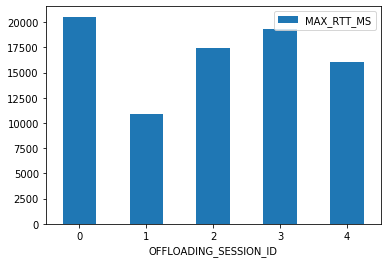

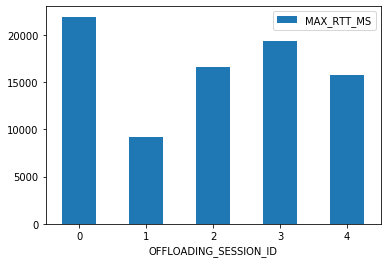

In [50]:
chartMaximumRttOfSessions(['ns3-log-Rm4CvS1jjqdym5l1-09-29-2021-14-36-20.csv', 'ns3-log-urnWC9gbSwEmNb3g-09-29-2021-16-17-23.csv'])

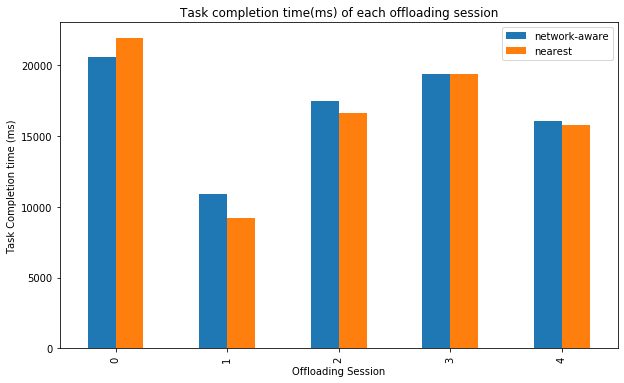

In [43]:
chartMaximumRttOfSessions(['ns3-log-Rm4CvS1jjqdym5l1-09-29-2021-14-36-20.csv', 'ns3-log-urnWC9gbSwEmNb3g-09-29-2021-16-17-23.csv'], ['network-aware', 'nearest'])
